In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas
from shapely.geometry import Polygon
from shapely.affinity import rotate
import numpy as np

from tile_units import TileUnit
from tile_map import Tiling

# Octagons (4.8.8)
Coloured various ways

<AxesSubplot:>

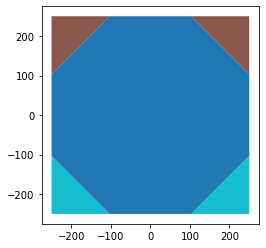

In [2]:
d = 500
R = d / 2 / np.cos(np.pi / 8)
angles = [np.pi / 8 + a * np.pi / 4 for a in range(8)]

octagon = Polygon([(R * np.cos(a), R * np.sin(a)) for a in angles])
A = octagon.exterior.coords[0]
B = octagon.exterior.coords[1]
C = (A[0], B[1])
s1 = Polygon([A, B, C])
squares = [rotate(s1, a, origin = (0, 0)) for a in range(0, 360, 90)]

labellings = [list(s) for s in ["abbbb", "abbcc", "abcbc", "abcde"]]
elements = [geopandas.GeoDataFrame(
    data = {"element_id": labels}, crs = 2193,
    geometry = geopandas.GeoSeries([octagon] + squares)
) for labels in labellings]
elements[1].plot(column = "element_id")

In [3]:
tile_units = []
for el in elements:
    tile_unit = TileUnit(spacing = d, crs = 2193)
    tile_unit.elements = el
    tile_unit.regularise_elements()
    tile_units.append(tile_unit)

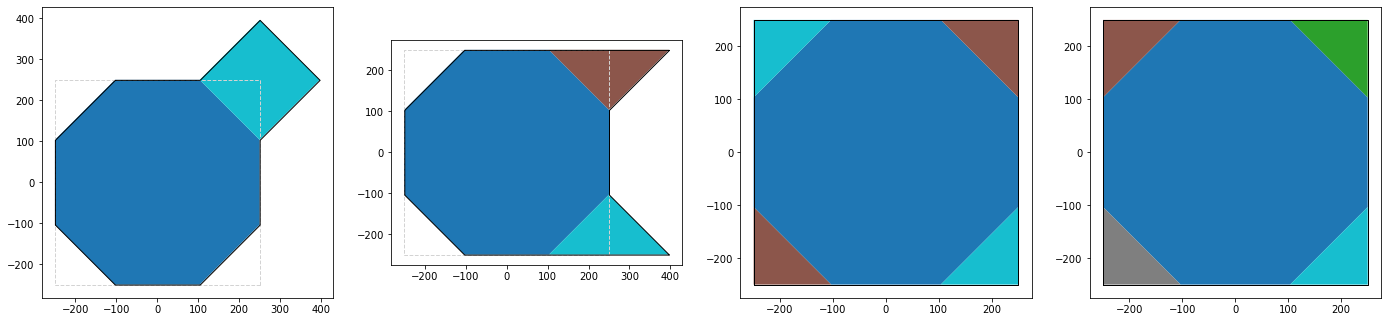

In [4]:
fig = pyplot.figure(figsize = (24, 6))
lbls = [141, 142, 143, 144]
for tile_unit, lbl in zip(tile_units, lbls):
    ax = fig.add_subplot(lbl)
    tile_unit.elements.plot(ax = ax, column = "element_id")
    tile_unit.tile.plot(ax = ax, edgecolor = "lightgrey", 
                        linestyle = "dashed", facecolor = "#00000000")
    tile_unit.regularised_tile.plot(ax = ax, edgecolor = "k", 
                                    facecolor = "#00000000")